In [1]:
import sqlite3
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

In [2]:
conn = sqlite3.Connection("../crowd.sqlite")

In [3]:
with conn:
    data = conn.execute("select name from sqlite_master where type = 'table'").fetchall()

In [4]:
with conn:
    data = conn.execute("SELECT t.* FROM video_500nm_colloids_40x t").fetchall()

In [5]:
tau = [tau + 1 for tau in range(len(data[0][1:]))]

In [6]:
dat = {v[0]: v[1:] for v in data}

In [7]:

func = lambda tau, A, tau_q, B: A * (1 - np.exp(-tau/tau_q)) + B

fits = [(q, *curve_fit(func, tau, dat[q], bounds=((-np.inf, 0, -np.inf),
                                                 (np.inf)))[0]) for q in dat.keys()]


In [8]:
Q = np.log([x[0] for x in fits])
TAU_Q = np.log([x[2] for x in fits])
A_Q = np.log([x[1] for x in fits])
B_Q = np.log([x[3] for x in fits])

/Users/jordan/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


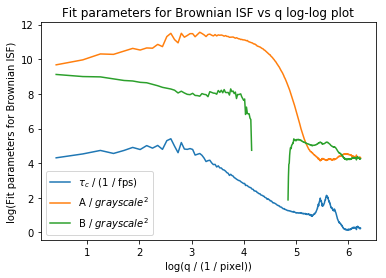

In [19]:
plt.plot(Q, TAU_Q, label=r"$\tau_c$ / (1 / fps)")
plt.plot(Q, A_Q, label=r"A / $grayscale ^ 2$")
plt.plot(Q, B_Q, label=r"B / $grayscale ^ 2$")
plt.xlabel("log(q / (1 / pixel))")
plt.ylabel("log(Fit parameters for Brownian ISF)")
plt.title("Fit parameters for Brownian ISF vs q log-log plot")
plt.legend(loc='lower left')
plt.savefig("500colloid_fit.png", pad_inches=0.8, dpi=300, bbox_inches="tight")

In [10]:
fits_filtered = list(filter(lambda f: 3.0 <= np.log(f[0]) <= 4.8, fits))
Q_filtered = np.log([x[0] for x in fits_filtered])
TAU_Q_filtered = np.log([x[2] for x in fits_filtered])

A_Q_filtered = np.log([x[1] for x in fits_filtered])
B_Q_filtered = np.log([x[3] for x in fits_filtered])

/Users/jordan/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  


In [11]:
linear_func = lambda x, m, c: m*x + c
fit, err = curve_fit(linear_func, Q_filtered, TAU_Q_filtered)

In [12]:
m_err = np.sqrt(err[0][0])
c_err = np.sqrt(err[1][1])
m, c = fit

In [13]:
m_err, c_err, m, c

(0.007322279882905342,
 0.030654971149400474,
 -1.9327263781158242,
 10.560828749751217)

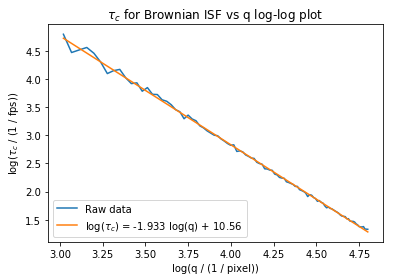

In [20]:
plt.plot(Q_filtered, TAU_Q_filtered, label="Raw data")
plt.plot(Q_filtered, m*Q_filtered + c, label=r"log($\tau_c$) = "+ f"{round(m,3)} log(q) + {round(c,2)}")
plt.xlabel("log(q / (1 / pixel))")
plt.ylabel(r"log($\tau_c$ / (1 / fps))")
plt.title(r"$\tau_c$ for Brownian ISF vs q log-log plot")
plt.legend(loc='lower left')
plt.savefig("500colloid_linear_region_fit.png", pad_inches=0.8, dpi=300, bbox_inches="tight")

In [64]:
D = np.exp(-c)

In [65]:
D, m_err, c_err, m, c

(2.5911368437523264e-05,
 0.007322279882905342,
 0.030654971149400474,
 -1.9327263781158242,
 10.560828749751217)

D = $\frac{k_b T}{6 \pi \eta R}$
R = $\frac{k_b T}{6 \pi \eta D}$

In [58]:
T = 300 #K
1.38*10**7 * T / (6 * np.pi * D_si)

3976519.8693210343

In [59]:
1.38/(6 * np.pi)

0.07321127382227186

In [111]:
1.38*10**-23 * (300) / (6 * np.pi * 10 ** - 3 * D * (60 * (146 * 10 ** -6)**2)) * 10 ** 9

6.627533115535057